In [2]:
#importing necessary libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, matthews_corrcoef 
import matplotlib.pyplot as plt

In [4]:
#loading the dataset
stroke_data= pd.read_csv('data_stroke_undersampled.csv')
stroke_data.head()

x= stroke_data.drop(columns=['stroke'])      #feature variable
y= stroke_data['stroke']                     #target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)    #splitting the dataset into 70% training data and 30% testing data 

### Random Forest

Model accuracy= 0.8627002288329519
Confusion Matrix:
 [[169  50]
 [ 10 208]]

Precision
Class 0 [Not Stroke]: 0.94, Class 1 [Stroke]: 0.81

Recall
Class 0 [Not Stroke]: 0.77, Class 1 [Stroke]: 0.95

F1 Score
Class 0 [Not Stroke]: 0.85, Class 1 [Stroke]: 0.87

Matthews Correlation Coefficient (MCC): 0.74

 ROC AUC Score: 0.9586527585773532




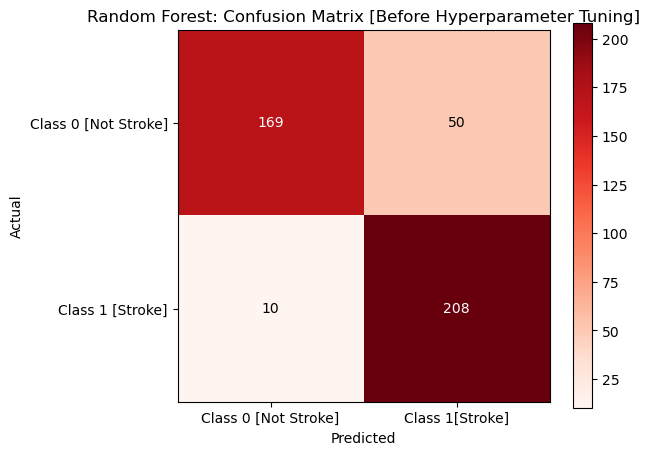

In [7]:
#Before hyperparameter tuning

random_forest= RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')    #initializing Random Forest
random_forest.fit(x_train, y_train)             #training the model using train dataset 

predict_y= random_forest.predict(x_test)           #making prediction on test data
prob_y= random_forest.predict_proba(x_test)[:,1]    #calculating probabilty estimates for Stroke (class1) class 

#Evaulation Metrics (accuracy, confusion matrix, precision, recall, f1 and Matthews Correlation Coefficient (MCC))
init_accuracy= random_forest.score(x_test, y_test)
print('Model accuracy=', init_accuracy)


init_cm= confusion_matrix(y_test, predict_y)
print('Confusion Matrix:\n', init_cm)

init_precision= precision_score(y_test, predict_y, average=None)
print('\nPrecision')
print(f'Class 0 [Not Stroke]: {init_precision[0]:.2f}, Class 1 [Stroke]: {init_precision[1]:.2f}')

init_recall= recall_score(y_test, predict_y, average=None)
print('\nRecall')
print(f'Class 0 [Not Stroke]: {init_recall[0]:.2f}, Class 1 [Stroke]: {init_recall[1]:.2f}')
                           
init_f1=f1_score(y_test, predict_y, average=None)
print('\nF1 Score')
print(f'Class 0 [Not Stroke]: {init_f1[0]:.2f}, Class 1 [Stroke]: {init_f1[1]:.2f}')

init_mcc= matthews_corrcoef(y_test,predict_y)
print(f'\nMatthews Correlation Coefficient (MCC): {init_mcc:.2f}')

init_roc_auc= roc_auc_score(y_test, prob_y)
print('\n ROC AUC Score:', init_roc_auc)

print('\n')

#Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6,5))
cm_fig1 = ax.imshow(init_cm, interpolation='nearest', cmap=plt.cm.Reds)
fig.colorbar(cm_fig1)
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Class 0 [Not Stroke]', 'Class 1[Stroke]'])
ax.set_yticklabels(['Class 0 [Not Stroke]', 'Class 1 [Stroke]'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, f'{init_cm[i,j]}', ha='center', va='center', color='white' if init_cm[i,j] > init_cm.max() /2 else 'black')

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Random Forest: Confusion Matrix [Before Hyperparameter Tuning]')
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 483}

Random Forest Model accuracy= 0.88

Confusion Matrix [Random Forest]
 [[179  40]
 [ 11 207]]

Precision [Random Forest]
Class 0 [Not Stroke]: 0.94, Class 1 [Stroke]: 0.84

Recall [Random Forest]
Class 0 [Not Stroke]: 0.82, Class 1 [Stroke]: 0.95

F1 Score [Random Forest]
Class 0 [Not Stroke]: 0.88, Class 1 [Stroke]: 0.89

Matthews Correlation Coefficient (MCC) for Random Forest: 0.77

ROC AUC Score [Random Forest]: 0.961250052364794




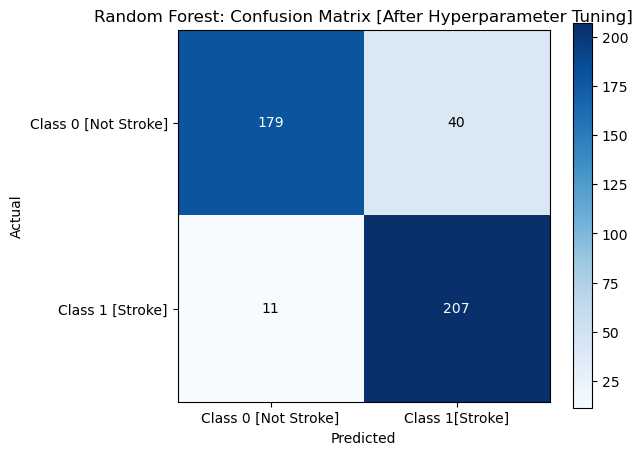

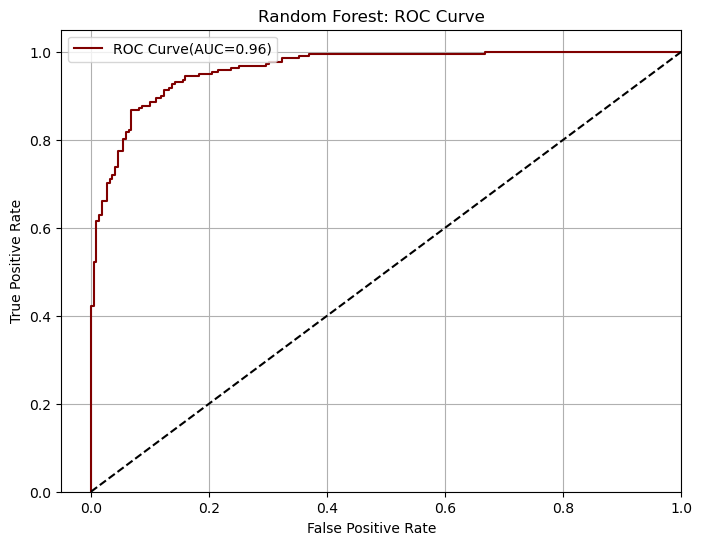

In [9]:
#After Hyperparameter tuning      

parameters= {'n_estimators':randint(100,500),
             'max_depth':[None, 10,20,30],
             'min_samples_split': randint(2, 10),  
             'min_samples_leaf': randint(1, 10),
             'max_features': [None, 'sqrt', 'log2'],
             'bootstrap': [True, False]
            }

random_search= RandomizedSearchCV(estimator=random_forest, param_distributions=parameters,n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=2)

random_search.fit(x_train, y_train)                #training the model using train dataset 

best_params =random_search.best_params_
print('Best Parameters:', best_params)

best_rf = random_search.best_estimator_

predict_y= best_rf.predict(x_test)           #making prediction on test data
prob_y= best_rf.predict_proba(x_test)[:,1]   #calculating probabilty estimates for Stroke(class 1) class


#Evaulation Metrics (accuracy, confusion matrix, precision, recall, f1 and Matthews Correlation Coefficient (MCC))
model_accuracy= best_rf.score(x_test, y_test)
print(f'\nRandom Forest Model accuracy= {model_accuracy:.2f}')

cm= confusion_matrix(y_test, predict_y)
print('\nConfusion Matrix [Random Forest]\n', cm)

precision= precision_score(y_test, predict_y, average=None)
print('\nPrecision [Random Forest]')
print(f'Class 0 [Not Stroke]: {precision[0]:.2f}, Class 1 [Stroke]: {precision[1]:.2f}')

recall= recall_score(y_test, predict_y, average=None)
print('\nRecall [Random Forest]')
print(f'Class 0 [Not Stroke]: {recall[0]:.2f}, Class 1 [Stroke]: {recall[1]:.2f}')
                           
f1=f1_score(y_test, predict_y, average=None)
print('\nF1 Score [Random Forest]')
print(f'Class 0 [Not Stroke]: {f1[0]:.2f}, Class 1 [Stroke]: {f1[1]:.2f}')

mcc= matthews_corrcoef(y_test,predict_y)
print(f'\nMatthews Correlation Coefficient (MCC) for Random Forest: {mcc:.2f}')

roc_auc= roc_auc_score(y_test, prob_y)
print('\nROC AUC Score [Random Forest]:', roc_auc)
print('\n')

#Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6,5))
cm_fig = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
fig.colorbar(cm_fig)
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Class 0 [Not Stroke]', 'Class 1[Stroke]'])
ax.set_yticklabels(['Class 0 [Not Stroke]', 'Class 1 [Stroke]'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, f'{cm[i,j]}', ha='center', va='center', color='white' if cm[i,j] > cm.max() /2 else 'black')

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Random Forest: Confusion Matrix [After Hyperparameter Tuning]')
plt.show()

print('\n')
#Visualizing ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, prob_y)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='maroon', label=f'ROC Curve(AUC={roc_auc:.2f})')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), 'k--')
plt.xlim(-0.05,1)
plt.ylim(0,1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest: ROC Curve')
plt.legend()
plt.grid()
plt.show()


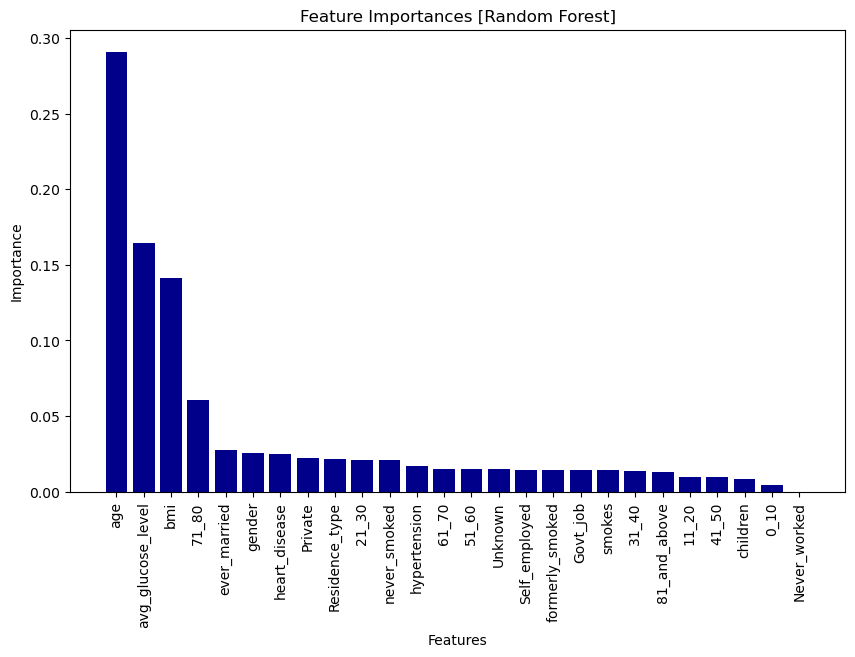

In [11]:
#Feature Importance 
feature_imp = best_rf.feature_importances_
indices = feature_imp.argsort()[::-1]
features = x_train.columns

#Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances [Random Forest]")
plt.bar(range(x_train.shape[1]), feature_imp[indices], align="center", color="darkblue")
plt.xticks(range(x_train.shape[1]), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

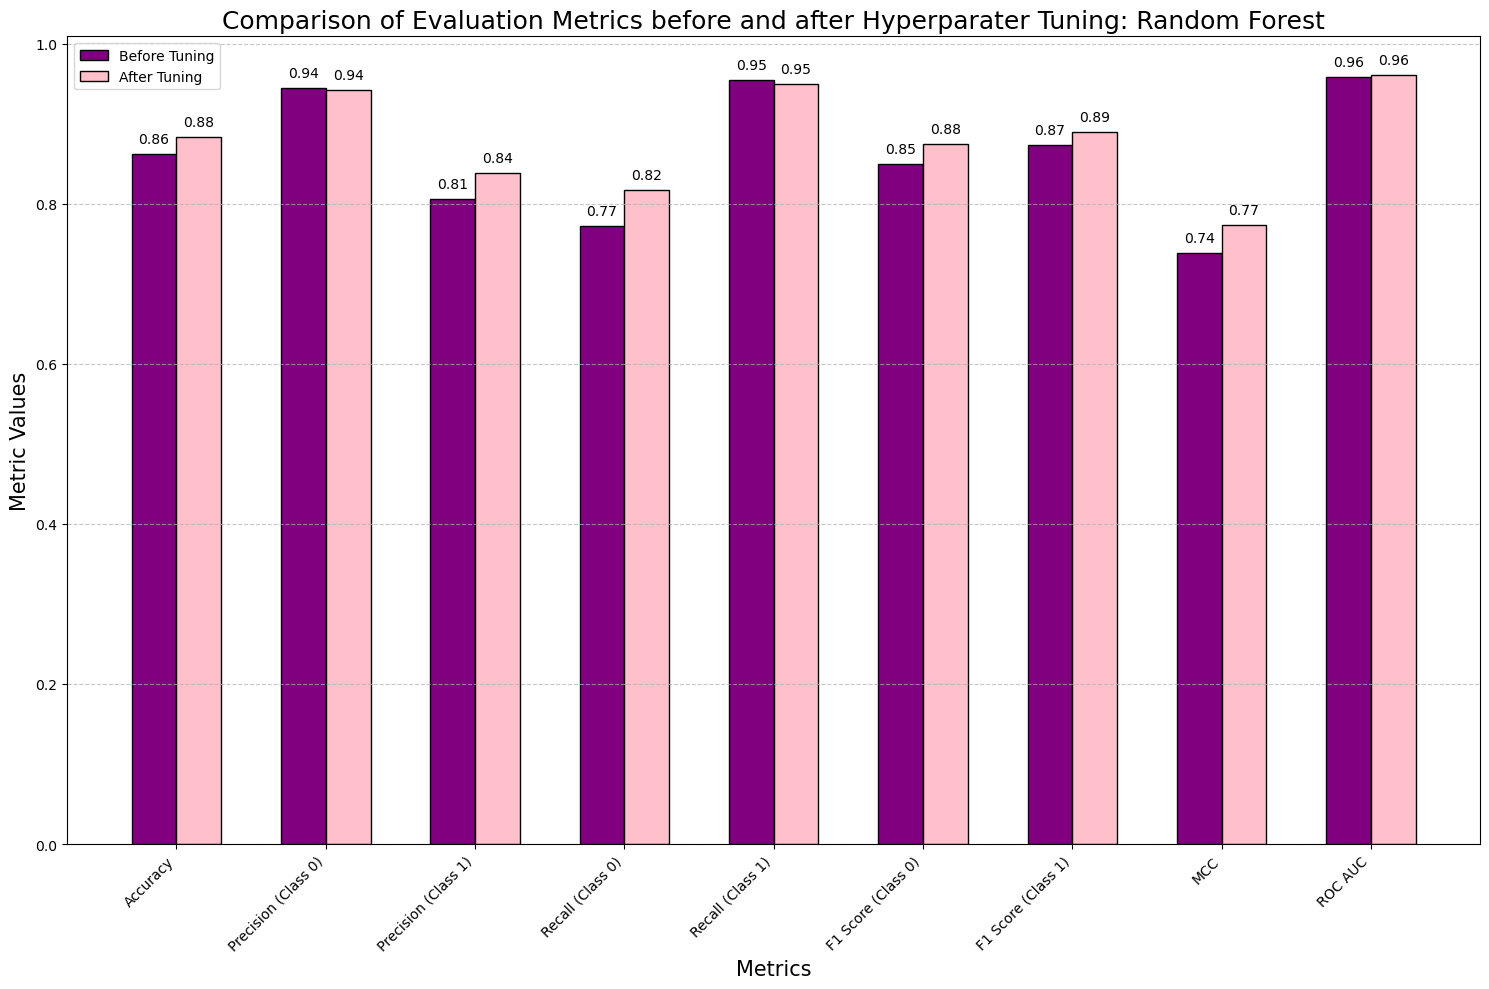

In [13]:
#Visualizing the changes in model performance before and after hyperparameter tuning using bar charts

initial_metrics = {
    'Accuracy': init_accuracy,
    'Precision (Class 0)': init_precision[0],
    'Precision (Class 1)': init_precision[1],
    'Recall (Class 0)': init_recall[0],
    'Recall (Class 1)': init_recall[1],
    'F1 Score (Class 0)': init_f1[0],
    'F1 Score (Class 1)': init_f1[1],
    'MCC': init_mcc,
    'ROC AUC': init_roc_auc
}

improved_metrics = {
    'Accuracy': model_accuracy,
    'Precision (Class 0)': precision[0],
    'Precision (Class 1)': precision[1],
    'Recall (Class 0)': recall[0],
    'Recall (Class 1)': recall[1],
    'F1 Score (Class 0)': f1[0],
    'F1 Score (Class 1)': f1[1],
    'MCC': mcc,
    'ROC AUC': roc_auc
}

compare = pd.DataFrame({'Metric Name': list(initial_metrics.keys()),
                              'Before Tuning': list(initial_metrics.values()),
                              'After Tuning': list(improved_metrics.values())})


fig, ax = plt.subplots(figsize=(15, 10))
bar_width = 0.3
x = np.arange(len(compare['Metric Name']))
bar1 = ax.bar(x - bar_width/2, compare['Before Tuning'], bar_width, label='Before Tuning', color='purple', edgecolor='black')
bar2 = ax.bar(x + bar_width/2, compare['After Tuning'], bar_width, label='After Tuning', color='pink', edgecolor='black')
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)
for bar in bar2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)
ax.set_xlabel('Metrics', fontsize=15)
ax.set_ylabel('Metric Values', fontsize=15)
ax.set_title('Comparison of Evaluation Metrics before and after Hyperparater Tuning: Random Forest', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(compare['Metric Name'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Feedforward Neural Network (FNN)

In [16]:
import random
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

In [18]:
#Scaling data for FNN
scaler = StandardScaler()
scale_x_train= scaler.fit_transform(x_train)
scale_x_test= scaler.transform(x_test)

scale_x_train= pd.DataFrame(scale_x_train, columns=x_train.columns)
scale_x_test= pd.DataFrame(scale_x_test, columns=x_test.columns)

[I 2025-01-01 18:59:13,676] A new study created in memory with name: no-name-270400b5-42d2-4ca5-a40e-ccdcb6d4698b
[I 2025-01-01 18:59:15,990] Trial 0 finished with value: 0.5288786888122559 and parameters: {'layer1': 32, 'layer2': 64, 'dropout1': 0.4, 'dropout2': 0.4, 'l2_regularizer1': 0.0001432249371823026, 'l2_regularizer2': 0.00014321698289111539, 'learning_rate': 0.00011430983876313228}. Best is trial 0 with value: 0.5288786888122559.
[I 2025-01-01 18:59:18,176] Trial 1 finished with value: 0.5683990120887756 and parameters: {'layer1': 64, 'layer2': 48, 'dropout1': 0.4, 'dropout2': 0.2, 'l2_regularizer1': 0.0009330606024425664, 'l2_regularizer2': 0.0006798962421591129, 'learning_rate': 0.00016305687346221485}. Best is trial 0 with value: 0.5288786888122559.
[I 2025-01-01 18:59:20,222] Trial 2 finished with value: 0.5437474846839905 and parameters: {'layer1': 16, 'layer2': 16, 'dropout1': 0.30000000000000004, 'dropout2': 0.4, 'l2_regularizer1': 0.0002703616066662003, 'l2_regularize


Best Parameters:
{'layer1': 32, 'layer2': 32, 'dropout1': 0.4, 'dropout2': 0.2, 'l2_regularizer1': 0.0006341572775495276, 'l2_regularizer2': 0.00011872731425335906, 'learning_rate': 0.0009702573394120733}


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5401 - loss: 0.8396 - val_accuracy: 0.6247 - val_loss: 0.6643
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5861 - loss: 0.6853 - val_accuracy: 0.7117 - val_loss: 0.6170
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6657 - loss: 0.6241 - val_accuracy: 0.7048 - val_loss: 0.5875
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7195 - loss: 0.5898 - val_accuracy: 0.7140 - val_loss: 0.5651
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7381 - loss: 0.5524 - val_accuracy: 0.7277 - val_loss: 0.5502
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7670 - loss: 0.5241 - val_accuracy: 0.7391 - val_loss: 0.5383
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━

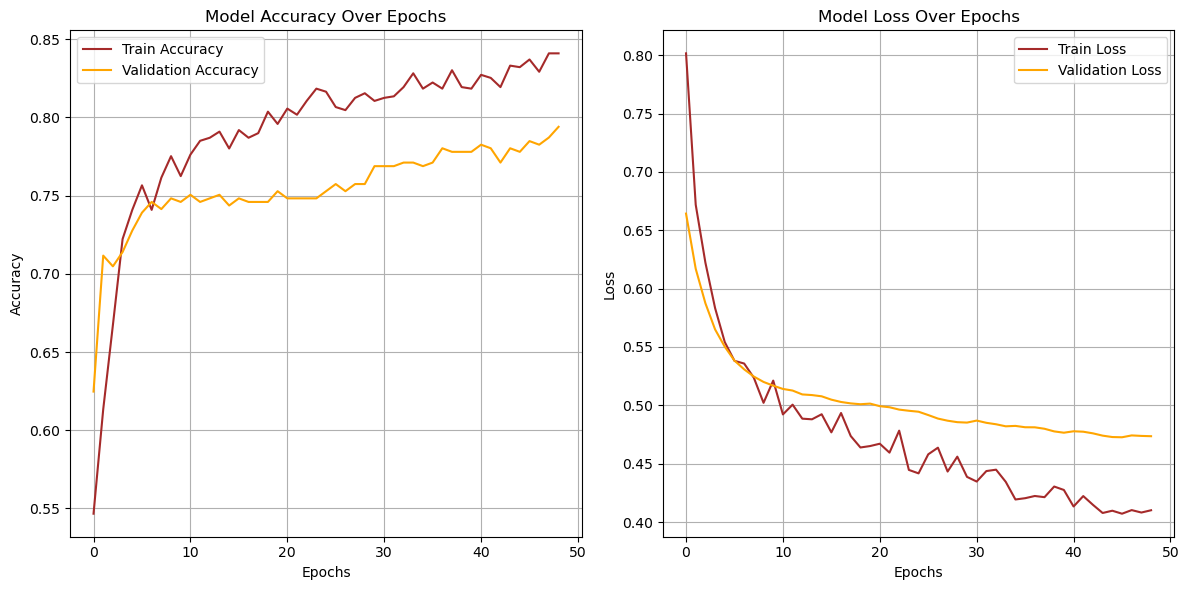

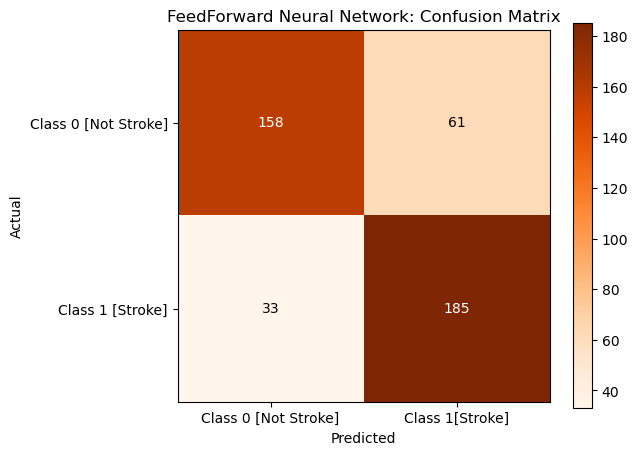

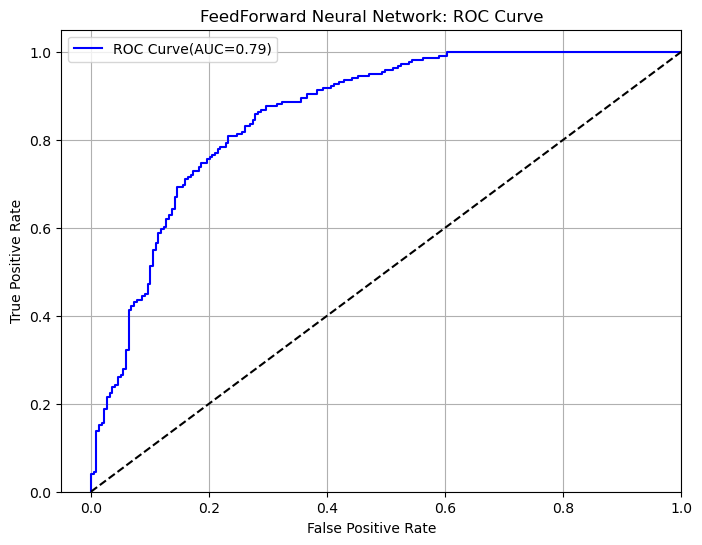

In [20]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

def hyperparameters(hp_test):
    layer1= hp_test.suggest_int('layer1', 16, 64, step=16)
    layer2= hp_test.suggest_int('layer2', 16, 64, step=16)
    dropout1= hp_test.suggest_float('dropout1',0.2, 0.5, step=0.1)
    dropout2= hp_test.suggest_float('dropout2',0.2, 0.5, step=0.1)
    l2_regularizer1= hp_test.suggest_float('l2_regularizer1',0.0001, 0.001, log=True)
    l2_regularizer2= hp_test.suggest_float('l2_regularizer2',0.0001, 0.001, log=True)
    learning_rate= hp_test.suggest_float('learning_rate', 0.0001, 0.001, log=True)
    
    fnn= Sequential([
    Input(shape=(scale_x_train.shape[1],)),
    Dense(layer1, activation='relu', kernel_regularizer=l2(l2_regularizer1)),
    Dropout(dropout1),
    Dense(layer2, activation='relu', kernel_regularizer=l2(l2_regularizer2)),
    Dropout(dropout2),
    Dense(1,activation='sigmoid')
    ])
    
    fnn.compile(optimizer=Adam(learning_rate=learning_rate),loss='binary_crossentropy', metrics=['accuracy'])
    
    fnn.fit(                     
        scale_x_train, y_train, 
        epochs=30, 
        batch_size=32, 
        validation_data=(scale_x_test, y_test),
        verbose=0
    )
    
    val_loss, val_accuracy= fnn.evaluate(scale_x_test, y_test, verbose=0)
    return val_loss

study= optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(hyperparameters, n_trials=10)

print('\nBest Parameters:')
print(study.best_params)
print('\n')

best_parameters= study.best_params
best_fnn= Sequential([
    Input(shape=(scale_x_train.shape[1],)),
    Dense(best_parameters['layer1'], activation='relu', kernel_regularizer=l2(best_parameters['l2_regularizer1'])),     #applying L2 regularization in hidden layers to penalize large weights and prevent overfitting 
    Dropout(best_parameters['dropout1']),
    Dense(best_parameters['layer2'], activation='relu', kernel_regularizer=l2(best_parameters['l2_regularizer2'])),
    Dropout(best_parameters['dropout2']),
    Dense(1,activation='sigmoid')
])

                                        
best_fnn.compile(optimizer=Adam(learning_rate=best_parameters['learning_rate']),loss='binary_crossentropy', metrics=['accuracy'])

earlystop= EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)      #early stopping to prevent overfitting
    
fnn_model= best_fnn.fit(                     
    scale_x_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=(scale_x_test, y_test),
    callbacks=earlystop,
    verbose=1
    )
    
fnn_prob_y= best_fnn.predict(scale_x_test)                 #making predictions
fnn_predict_y= (fnn_prob_y>0.5).astype(int).flatten()      #converting the predictions to class 0 or 1


#Evaluation Metrics (accuracy, confusion matrix, precision, recall, f1 and Matthews Correlation Coefficient (MCC))
fnn_accuracy= best_fnn.evaluate(scale_x_test, y_test)
print(f'\nFNN Model Accuracy: {fnn_accuracy[1]:.2f}') 

fnn_cm= confusion_matrix(y_test, fnn_predict_y)
print('\nFNN Confusion Matrix\n', fnn_cm)

fnn_precision= precision_score(y_test, fnn_predict_y, average=None)
print('\nPrecision [FNN]')
print(f'Class 0 [Not Stroke]: {fnn_precision[0]:.2f}, Class 1 [Stroke]: {fnn_precision[1]:.2f}')

fnn_recall= recall_score(y_test, fnn_predict_y, average=None)
print('\nRecall[FNN]')
print(f'Class 0 [Not Stroke]: {fnn_recall[0]:.2f}, Class 1 [Stroke]: {fnn_recall[1]:.2f}')

fnn_f1= f1_score(y_test, fnn_predict_y, average=None)
print('\nF1 Score [FNN]')
print(f'Class 0 [Not Stroke]: {fnn_f1[0]:.2f}, Class 1 [Stroke]: {fnn_f1[1]:.2f}')

fnn_mcc= matthews_corrcoef(y_test, fnn_predict_y)
print(f'\nMatthews Correlation Coefficient (MCC) for FNN: {fnn_mcc:.2f}')

fnn_roc_auc= roc_auc_score(y_test, fnn_predict_y)
print('\nROC AUC Score(FNN)=', fnn_roc_auc)
print('\n')

#Visualizing Model accuracy and loss over epochs
history=fnn_model.history
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy', color='brown')
plt.plot(history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss', color='brown')
plt.plot(history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

print('\n')
#Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6,5))
fnn_cm_fig = ax.imshow(fnn_cm, interpolation='nearest', cmap=plt.cm.Oranges)
fig.colorbar(fnn_cm_fig)
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Class 0 [Not Stroke]', 'Class 1[Stroke]'])
ax.set_yticklabels(['Class 0 [Not Stroke]', 'Class 1 [Stroke]'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, f'{fnn_cm[i,j]}', ha='center', va='center', color='white' if fnn_cm[i,j] > cm.max() /2 else 'black')

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('FeedForward Neural Network: Confusion Matrix')
plt.show()

print('\n')
#Visualizing ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, fnn_prob_y)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve(AUC={fnn_roc_auc:.2f})')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), 'k--')
plt.xlim(-0.05,1)
plt.ylim(0,1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FeedForward Neural Network: ROC Curve')
plt.legend()
plt.grid()
plt.show()




14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
14/14 ━━━━━━━━━━━━

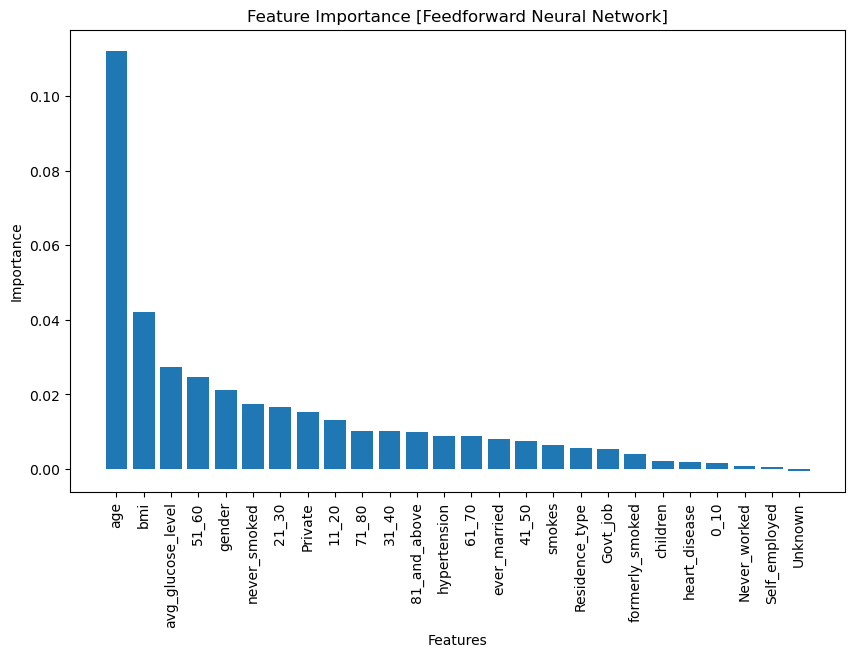

In [22]:
#Feature Importance using Permutation Importance

def score(estimate, X, y):
    y_pred = estimate.predict(X)
    return accuracy_score(y, (y_pred > 0.5).astype(int))

# Calculate permutation importance with custom scoring
accuracy = permutation_importance(best_fnn, scale_x_test, y_test, n_repeats=10, random_state=42, scoring=score)

# Get feature importance scores (mean decrease in accuracy)
importance = accuracy.importances_mean
index = importance.argsort()[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance[index], align='center')
plt.xticks(range(len(importance)), scale_x_train.columns[index], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance [Feedforward Neural Network]")
plt.show()
